# CHAPTER19 딥러닝 구현

## 19.1 딥러닝 개요

### 19.1.1 딥러닝 체험

- 케라스와 텐서플로로 심층 신경망을 사용할 것이다

Epoch 1/5
12/12 [==============================] - 0s 17ms/step - loss: 2.4061 - accuracy: 0.1418 - val_loss: 2.0613 - val_accuracy: 0.4950
Epoch 2/5
12/12 [==============================] - 0s 5ms/step - loss: 2.0986 - accuracy: 0.2568 - val_loss: 1.8626 - val_accuracy: 0.6320
Epoch 3/5
12/12 [==============================] - 0s 5ms/step - loss: 1.8826 - accuracy: 0.3710 - val_loss: 1.6883 - val_accuracy: 0.6910
Epoch 4/5
12/12 [==============================] - 0s 6ms/step - loss: 1.7225 - accuracy: 0.4452 - val_loss: 1.5304 - val_accuracy: 0.7230
Epoch 5/5
12/12 [==============================] - 0s 5ms/step - loss: 1.5492 - accuracy: 0.5430 - val_loss: 1.3904 - val_accuracy: 0.7330


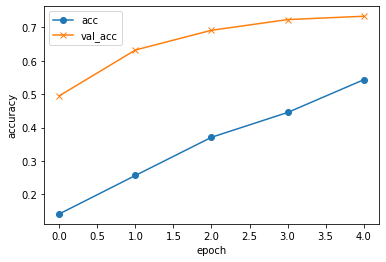

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow import keras
from keras import layers
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential([
    layers.Dense(256, input_dim=784, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_accuracy'], label='val_acc', ls='-', marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

### 19.1.2 딥러닝이란(1)

- 동물의 신경망을 참고로 한 심층 신경망 모델을 사용해 데이터의 분류나 회귀를 실시
- 딥러닝은 머신러닝 방법 중 하나

### 19.1.3 딥러닝이란(3)

- 신경망의 기본이 되는 뉴런. x1,x2가 입력되어 가중치 w1,w2와 곱해져 두개의 합이 임계값보다 높으면 뉴런이 1을 출력, 아니면 0을 출력
- 뉴런만으론 복잡한 문제를 해결할 수 없기에 나온 것이 심층 신경망이다

### 19.1.4 딥러닝을 이용한 분류의 흐름

1. 네트워크 모델 작성 - 여러 뉴런을 묶은 층을 거듭해서 심층 네트워크 구축
2. 모델에 훈련용 데이터를 부여하고 학습 - 오차역전파법을 이용해 각 뉴런의 가중치 조정
3. 분류할 데이터 모델에 전달 - 학습된 모델을 사용하는 추론 단계.

## 19.2 필기체 숫자의 분류

### 19.2.1 분류의 흐름

1. 데이터 준비
2. 신경망 모델 구축
3. 모델에 데이터를 전달해서 학습
4. 모델의 분류 정확도 평가

### 19.2.2 심층 신경망

- 여기선 완전연결층이 2층인 단순한 신경망을 만들 것이다
- 입력을 받는 층은 입력층, 출력하는 층은 출력층, 입력과 출력층 사이의 층을 은닉층이라 한다
- 세로로 늘어선 벡터 하나하나를 노드라 하며 그 차원의 수를 노드 수라 한다


### 19.2.3 keras도입

- keras는 Tensorflow의 래퍼 라이브러리로 Tensorflow를 그대로 사용하는 것보다 직관적이며 보다 간결하게 코드를 작성할 수 있게한다
- 래퍼는 다른 시스템에 해당 시스템을 내포하여 보다 사용하기 쉽게 만드는것

### 19.2.4 데이터 준비


In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### 19.2.5 모델 생성

Epoch 1/5
12/12 [==============================] - 0s 16ms/step - loss: 1.6419 - accuracy: 0.5248 - val_loss: 1.1652 - val_accuracy: 0.6800
Epoch 2/5
12/12 [==============================] - 0s 4ms/step - loss: 0.8565 - accuracy: 0.7948 - val_loss: 0.8036 - val_accuracy: 0.7600
Epoch 3/5
12/12 [==============================] - 0s 7ms/step - loss: 0.5961 - accuracy: 0.8507 - val_loss: 0.6824 - val_accuracy: 0.7850
Epoch 4/5
12/12 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.8757 - val_loss: 0.5614 - val_accuracy: 0.8470
Epoch 5/5
12/12 [==============================] - 0s 5ms/step - loss: 0.4054 - accuracy: 0.8950 - val_loss: 0.5109 - val_accuracy: 0.8370


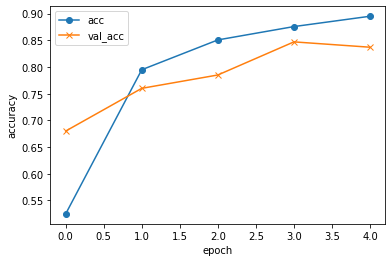

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(layers.Dense(256, input_dim=784))
model.add(layers.Activation('sigmoid'))
######################### 은닉층과 Relu활성화 함수 작성 #################################
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
######################### 은닉층과 Relu활성화 함수 작성 #################################
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_accuracy'], label='val_acc', ls='-', marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

### 19.2.6 모델 학습

- 모델에 훈련 데이터를 전달하여 학습을 시킨다
- verbose로 학습의 진척 상황 표시 조정 가능
- epoch는 동일한 데이터셋으로 몇번 반복 학습할 지를 지정

Epoch 1/5
12/12 [==============================] - 1s 22ms/step - loss: 1.6367 - accuracy: 0.5232 - val_loss: 1.1828 - val_accuracy: 0.6930
Epoch 2/5
12/12 [==============================] - 0s 5ms/step - loss: 0.8942 - accuracy: 0.7768 - val_loss: 0.8348 - val_accuracy: 0.7690
Epoch 3/5
12/12 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.8503 - val_loss: 0.6630 - val_accuracy: 0.7990
Epoch 4/5
12/12 [==============================] - 0s 4ms/step - loss: 0.5111 - accuracy: 0.8647 - val_loss: 0.5830 - val_accuracy: 0.8300
Epoch 5/5
12/12 [==============================] - 0s 5ms/step - loss: 0.4534 - accuracy: 0.8762 - val_loss: 0.5488 - val_accuracy: 0.8230


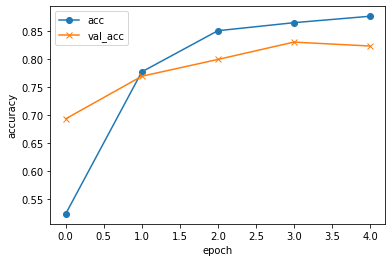

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(layers.Dense(256, input_dim=784))
model.add(layers.Activation('sigmoid'))
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

######################### 학습하는 코드 작성 #################################
history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test))
######################### 학습하는 코드 작성 #################################

plt.plot(history.history['accuracy'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_accuracy'], label='val_acc', ls='-', marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

### 19.2.7 모델 평가

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(layers.Dense(256, input_dim=784))
model.add(layers.Activation('sigmoid'))
model.add(layers.Dense(128))
model.add(layers.Activation('sigmoid'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1)


######################### 모델 평가하는 코드 작성 #################################
loss, acc = model.evaluate(X_test, y_test)
######################### 모델 평가하는 코드 작성 #################################

print(f'evaluate loss : {loss} \nevaluate acc :{acc} ')

Epoch 1/5
12/12 [==============================] - 0s 3ms/step - loss: 2.1742 - accuracy: 0.3435
Epoch 2/5
12/12 [==============================] - 0s 3ms/step - loss: 1.8798 - accuracy: 0.6432
Epoch 3/5
12/12 [==============================] - 0s 3ms/step - loss: 1.6484 - accuracy: 0.7247
Epoch 4/5
12/12 [==============================] - 0s 3ms/step - loss: 1.4404 - accuracy: 0.7637
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 1.2682 - accuracy: 0.7490
evaluate loss : 1.2682006359100342 
evaluate acc :0.7490000128746033 


### 19.2.8 모델에 의한 분류

- predict()메서드로 예측치를 얻을 수 있다

Epoch 1/5
12/12 [==============================] - 0s 3ms/step - loss: 2.1838 - accuracy: 0.3343
Epoch 2/5
12/12 [==============================] - 0s 3ms/step - loss: 1.8812 - accuracy: 0.6167
Epoch 3/5
12/12 [==============================] - 0s 3ms/step - loss: 1.6428 - accuracy: 0.6992
Epoch 4/5
12/12 [==============================] - 0s 3ms/step - loss: 1.4387 - accuracy: 0.7470
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 1.2840 - accuracy: 0.7290
evaluate loss : 1.2839820384979248 
evaluate acc :0.7289999723434448 


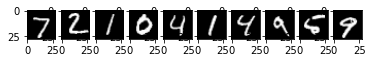

1/1 [==============================] - 0s 68ms/step
[7 6 1 0 4 1 7 9 6 9]


In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(layers.Dense(256, input_dim=784))
model.add(layers.Activation('sigmoid'))
model.add(layers.Dense(128))
model.add(layers.Activation('sigmoid'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1)

loss, acc = model.evaluate(X_test, y_test)
print(f'evaluate loss : {loss} \nevaluate acc :{acc} ')


for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i].reshape((28,28)), 'gray')
plt.show()

######################### 예측하는 코드 작성 #################################
pred = np.argmax(model.predict(X_test[:10]), axis=1)
print(pred)
######################### 예측하는 코드 작성 #################################